In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graddesc_test import *

## Gradient Descent with constant step size

In [2]:
def constant(alpha=0.005, **kwargs):
    """Constant function
    Parameters:
        alpha: [float], stepsize
        **kwargs: [keyword args] 
    Returns:
        float"""
    return alpha

def gradientdescent(f, x,  method, tol=1e-9, maxit=2000, callback=None):
    x = np.array(x, dtype=np.float64)
    for k in range(maxit):
        if not callback is None:
            callback(x)
        g = grad(f, x)
        gnorm = np.linalg.norm(g)
        if gnorm<tol:
            return x
        d = -g
        alpha = method(f=f, x=x, g=g, d=d)
        x += alpha*d
    print("Optimization not successful! Reached maxit (",maxit,").", sep="")
    return x

Iterations:  451
Solution:  [ 9.75361609e-11 -2.16640094e-12]


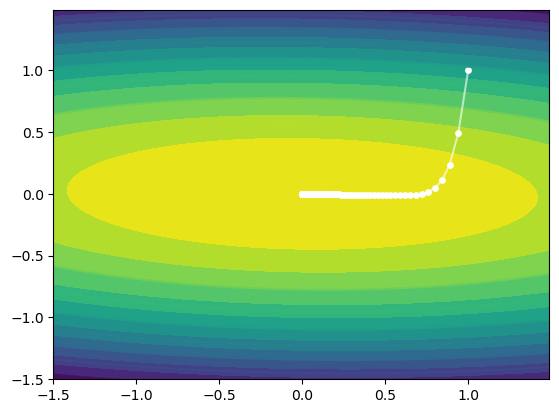

In [3]:
callback = CallBack()
x0 = np.ones(2)
gradientdescent(f, x0,  method=constant, callback=callback)
print("Iterations: ", len(callback.xk)-1)
print("Solution: ", callback.xk[-1])
callback.plot(lambda x:-f(x))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from graddesc_test import *

## Gradient Descent  with exact line search

In [5]:
def exact(f, x, g, d, **kwargs):
    """Exact stepsize in case of f = xQx. 
    This is just for presentation purposes.
    
    Parameters:
        f: callable, Function to be minimized
        x: ndarray, current iterate x
        g: ndarray, current gradient of f() at x
        d: ndarray, current descent direction, e.g. -g
        **kwargs: [keyword args] 
    Returns:
        float"""
    return g@g/f(g)/2

def gradientdescent(f, x, method, tol=1e-5, maxit=2000, callback=None):  
    x = np.array(x, dtype=np.float64)
    for k in range(maxit):
        if not callback is None:
            callback(x)
        g = grad(f, x)
        gnorm = np.linalg.norm(g)
        if gnorm<tol:
            return x
        d = -g
        alpha = method(f=f, x=x, g=g, d=d)
        x += alpha*d
    print("Optimization not successful! Reached maxit (",maxit,").", sep="")
    return x

In [ ]:
f = lambda x: x[0]**2 * 10 + x[1]**2

In [ ]:
startvalues = [(1,1),(0.1,1), (1, 0.1), (0,1), (1,0)]

In [ ]:
for x0 in startvalues:
    callback = CallBack()
    gradientdescent(f, x0, method=exact, callback=callback)
    print("Iterations: ", len(callback.xk)-1)
    print("Solution: ", callback.xk[-1])
    callback.plot(f)